In [215]:
import pandas as pd
import numpy as np
from datetime import datetime


In [216]:
# Load the alert data

snort1_alert_df = pd.read_csv('/Users/marshal/Desktop/cooperative_snort /snort1/snort1_alert.csv')



# Load the labeled dataset 
label_df = pd.read_csv('/Users/marshal/Desktop/test/Mergeddata.csv', encoding='ISO-8859-1')



In [217]:
# Exclude a 'Positives' column from the DataFrame
columns_to_fill = [col for col in snort1_alert_df.columns if col != 'Positives']

#  replace NaN values with 0 in all columns 
snort1_alert_df[columns_to_fill] = snort1_alert_df[columns_to_fill].fillna(0)

print(snort1_alert_df)

                   Timestamp  GID  \
0     07/07-08:00:51.577564     1   
1     07/07-08:00:51.577567     1   
2     07/07-08:00:52.478240     1   
3     07/07-08:00:52.478244     1   
4     07/07-08:01:05.161721     1   
...                      ...  ...   
7647  07/07-16:01:22.145494     1   
7648  07/07-16:00:52.263713     1   
7649  07/07-16:01:24.606662     1   
7650  07/07-16:01:24.606663     1   
7651  07/07-16:01:30.328592     1   

                                          event.msg  Protocol      Source_IP  \
0     ICMP Destination Unreachable Port Unreachable      ICMP  192.168.10.14   
1     ICMP Destination Unreachable Port Unreachable      ICMP  192.168.10.14   
2     ICMP Destination Unreachable Port Unreachable      ICMP  192.168.10.14   
3     ICMP Destination Unreachable Port Unreachable      ICMP  192.168.10.14   
4     ICMP Destination Unreachable Port Unreachable      ICMP  192.168.10.14   
...                                             ...       ...            ..

In [218]:
snort1_alert_df

,Timestamp,GID,event.msg,Protocol,Source_IP,Source_Port,Destination_IP,Destination_Port,Source_MAC_Address,Destination_MAC_Address,Positives
0,07/07-08:00:51.577564,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
1,07/07-08:00:51.577567,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
2,07/07-08:00:52.478240,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
3,07/07-08:00:52.478244,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
4,07/07-08:01:05.161721,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7647,07/07-16:01:22.145494,1,NETBIOS SMB IPC$ unicode share access,TCP,192.168.10.25,54244.0,192.168.10.50,139.0,00:25:00:A8:C4:60,00:19:B9:0A:69:F1,NaN
7648,07/07-16:00:52.263713,1,INFO web bug 0x0 gif attempt,TCP,14.0.67.56,80.0,192.168.10.25,54187.0,00:C1:B1:14:EB:31,00:25:00:A8:C4:60,NaN
7649,07/07-16:01:24.606662,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.8,0.0,00:C1:B1:14:EB:31,B8:AC:6F:36:08:F5,NaN
7650,07/07-16:01:24.606663,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.15,0.0,00:C1:B1:14:EB:31,00:1E:4F:D4:CA:28,NaN


In [219]:
#check column names of snort1_alert_df and label_df
print(snort1_alert_df.columns)
print(label_df.columns)

Index([' Timestamp', 'GID', 'event.msg', ' Protocol', ' Source_IP',
       ' Source_Port', ' Destination_IP', ' Destination_Port',
       'Source_MAC_Address', 'Destination_MAC_Address', 'Positives'],
      dtype='object')
Index(['ï»¿Flow_ID', ' Source_IP', ' Source_Port', ' Destination_IP',
       ' Destination_Port', ' Protocol', ' Timestamp', ' Label'],
      dtype='object')


In [220]:
# to remove the empty space in column  title 

snort1_alert_df.columns = snort1_alert_df.columns.str.strip()
label_df.columns = label_df.columns.str.strip()


In [221]:
#print the column names to verify

print(snort1_alert_df.columns)
print(label_df.columns)

Index(['Timestamp', 'GID', 'event.msg', 'Protocol', 'Source_IP', 'Source_Port',
       'Destination_IP', 'Destination_Port', 'Source_MAC_Address',
       'Destination_MAC_Address', 'Positives'],
      dtype='object')
Index(['ï»¿Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')


In [222]:
snort1_alert_df

,Timestamp,GID,event.msg,Protocol,Source_IP,Source_Port,Destination_IP,Destination_Port,Source_MAC_Address,Destination_MAC_Address,Positives
0,07/07-08:00:51.577564,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
1,07/07-08:00:51.577567,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
2,07/07-08:00:52.478240,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
3,07/07-08:00:52.478244,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
4,07/07-08:01:05.161721,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7647,07/07-16:01:22.145494,1,NETBIOS SMB IPC$ unicode share access,TCP,192.168.10.25,54244.0,192.168.10.50,139.0,00:25:00:A8:C4:60,00:19:B9:0A:69:F1,NaN
7648,07/07-16:00:52.263713,1,INFO web bug 0x0 gif attempt,TCP,14.0.67.56,80.0,192.168.10.25,54187.0,00:C1:B1:14:EB:31,00:25:00:A8:C4:60,NaN
7649,07/07-16:01:24.606662,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.8,0.0,00:C1:B1:14:EB:31,B8:AC:6F:36:08:F5,NaN
7650,07/07-16:01:24.606663,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.15,0.0,00:C1:B1:14:EB:31,00:1E:4F:D4:CA:28,NaN


In [223]:
snort1_alert_df

,Timestamp,GID,event.msg,Protocol,Source_IP,Source_Port,Destination_IP,Destination_Port,Source_MAC_Address,Destination_MAC_Address,Positives
0,07/07-08:00:51.577564,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
1,07/07-08:00:51.577567,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
2,07/07-08:00:52.478240,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
3,07/07-08:00:52.478244,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
4,07/07-08:01:05.161721,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7647,07/07-16:01:22.145494,1,NETBIOS SMB IPC$ unicode share access,TCP,192.168.10.25,54244.0,192.168.10.50,139.0,00:25:00:A8:C4:60,00:19:B9:0A:69:F1,NaN
7648,07/07-16:00:52.263713,1,INFO web bug 0x0 gif attempt,TCP,14.0.67.56,80.0,192.168.10.25,54187.0,00:C1:B1:14:EB:31,00:25:00:A8:C4:60,NaN
7649,07/07-16:01:24.606662,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.8,0.0,00:C1:B1:14:EB:31,B8:AC:6F:36:08:F5,NaN
7650,07/07-16:01:24.606663,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.15,0.0,00:C1:B1:14:EB:31,00:1E:4F:D4:CA:28,NaN


In [212]:
# Merging  'snort!-alert_df' and 'label_df' 

merged_df = snort1_alert_df.merge(label_df, on=['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port'], how='inner')

#  boolean masking  for matching rows
mask = merged_df.shape[0] > 0  

# Add a new 'Positives' column to 'snort1_alert_df' and set it based on the mask
snort1_alert_df['Positives'] = mask


In [224]:


# Create a boolean mask for matching rows based on the specified columns
mask = (
    snort1_alert_df['Source_IP'].isin(label_df['Source_IP']) &
    snort1_alert_df['Source_Port'].isin(label_df['Source_Port']) &
    snort1_alert_df['Destination_IP'].isin(label_df['Destination_IP']) &
    snort1_alert_df['Destination_Port'].isin(label_df['Destination_Port'])
)

# Add a new 'Positives' column to 'alert_df' and set it to 'True' for matching rows
snort1_alert_df['Positives'] = mask


In [225]:
snort1_alert_df

,Timestamp,GID,event.msg,Protocol,Source_IP,Source_Port,Destination_IP,Destination_Port,Source_MAC_Address,Destination_MAC_Address,Positives
0,07/07-08:00:51.577564,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
1,07/07-08:00:51.577567,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
2,07/07-08:00:52.478240,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
3,07/07-08:00:52.478244,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
4,07/07-08:01:05.161721,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
...,...,...,...,...,...,...,...,...,...,...,...
7647,07/07-16:01:22.145494,1,NETBIOS SMB IPC$ unicode share access,TCP,192.168.10.25,54244.0,192.168.10.50,139.0,00:25:00:A8:C4:60,00:19:B9:0A:69:F1,True
7648,07/07-16:00:52.263713,1,INFO web bug 0x0 gif attempt,TCP,14.0.67.56,80.0,192.168.10.25,54187.0,00:C1:B1:14:EB:31,00:25:00:A8:C4:60,True
7649,07/07-16:01:24.606662,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.8,0.0,00:C1:B1:14:EB:31,B8:AC:6F:36:08:F5,True
7650,07/07-16:01:24.606663,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.15,0.0,00:C1:B1:14:EB:31,00:1E:4F:D4:CA:28,True


In [226]:
# check  true and false values in the 'Positives' column
positives_counts = snort1_alert_df['Positives'].value_counts()

# Print the counts
print("Number of True Positives:", positives_counts[True])
print("Number of False Positives:", positives_counts[False])


Number of True Positives: 6622
Number of False Positives: 1030


In [227]:
# change the format of timestamp to match with other dataset

label_df['Timestamp'] = label_df['Timestamp'].str.replace('/2017', '-')




In [228]:
label_df

,ï»¿Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,07/07- 03:30,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,07/07- 03:30,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,07/07- 03:30,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,07/07- 03:30,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,07/07- 03:30,BENIGN
...,...,...,...,...,...,...,...,...
703240,192.168.10.3-192.168.10.14-53-51018-17,192.168.10.14,51018,192.168.10.3,53,17,07/07- 12:59,BENIGN
703241,192.168.10.3-192.168.10.14-53-49984-17,192.168.10.14,49984,192.168.10.3,53,17,07/07- 12:59,BENIGN
703242,192.168.10.3-192.168.10.14-53-64015-17,192.168.10.14,64015,192.168.10.3,53,17,07/07- 12:59,BENIGN
703243,192.168.10.17-198.100.147.178-123-123-17,192.168.10.17,123,198.100.147.178,123,17,07/07- 12:59,BENIGN


In [229]:
snort1_alert_df['Positives'].value_counts()

Positives
True     6622
False    1030
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


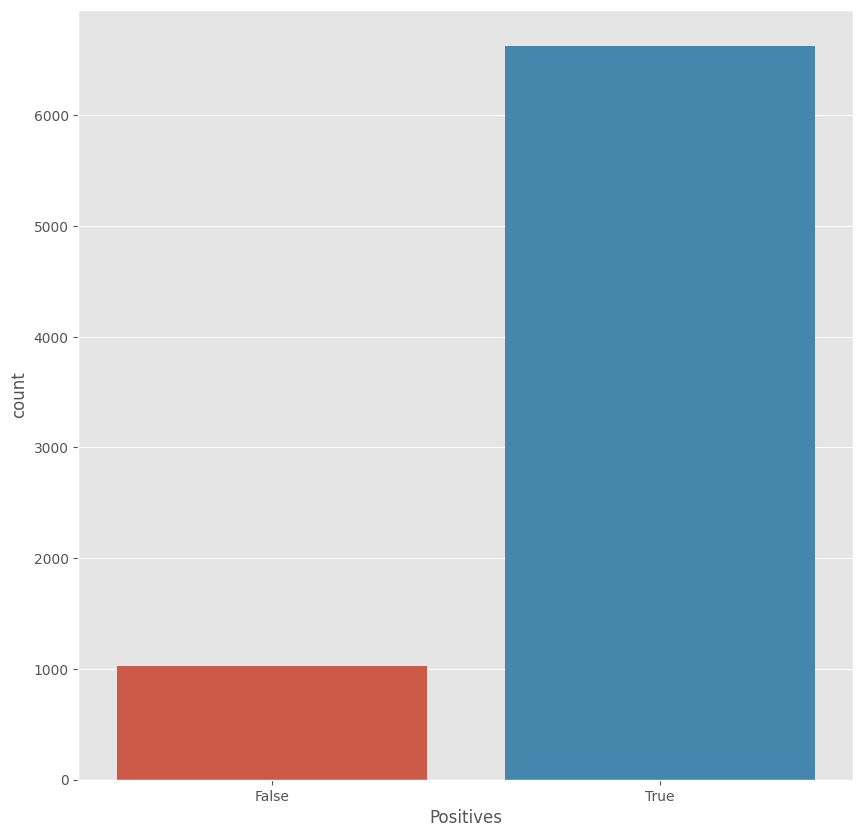

In [230]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(data=snort1_alert_df, x="Positives")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


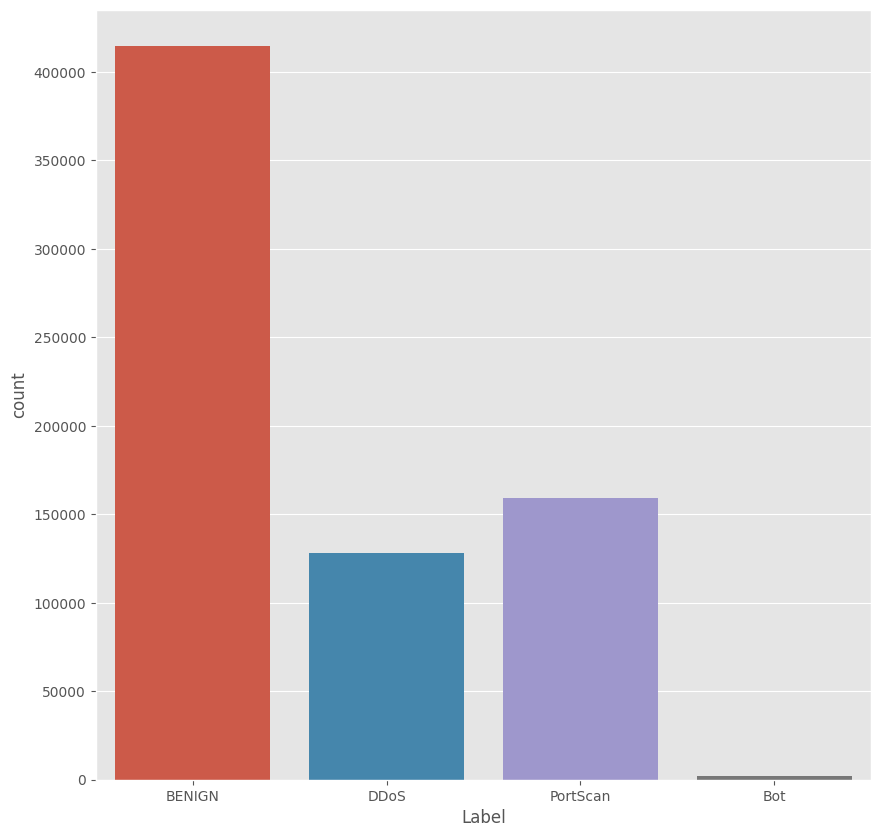

In [202]:
# merged data
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(data=label_df, x="Label")
plt.show()

In [232]:
# Given data for Snort's performance
total_packets = 703245
benign_packets = 414322
malicious_packets = 288923
snort_alerts = 7652
true_positives = 6622
false_positives = 1030


In [233]:
#to find true negatives
true_negatives = benign_packets - false_positives
print(f"True Negatives (TN): {true_negatives}")

True Negatives (TN): 413292


In [234]:
#to find false negatives

false_negatives = malicious_packets - true_positives
print(f"False Negatives (FN): {false_negatives}")

False Negatives (FN): 282301


In [235]:
#precision

precision = true_positives / (true_positives + false_positives)
print(f"Precision: {precision:.3f}")

Precision: 0.865


In [236]:
#recall

recall = true_positives / (true_positives + false_negatives)
print(f"Recall: {recall:.3f}")

Recall: 0.023


In [237]:
#F1-score for imbalanced datasets

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.3f}")

F1 Score: 0.045


In [256]:

# Data for plotting

labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [true_positives, true_negatives, false_positives, false_negatives]


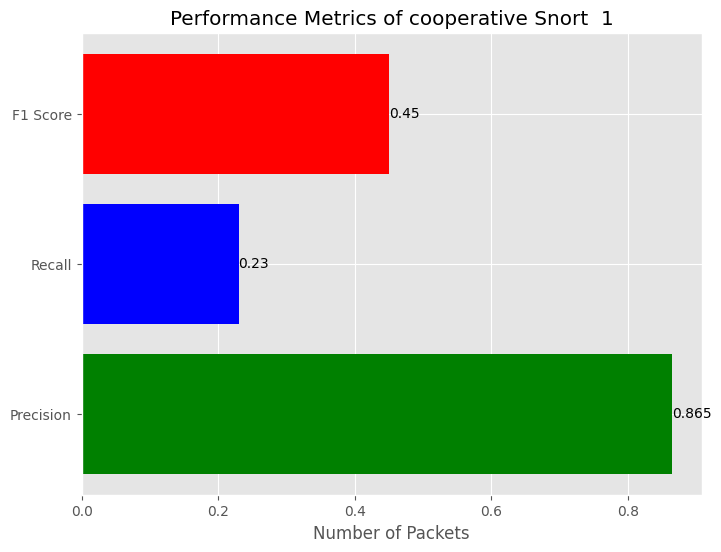

In [255]:

# Create bar chart
plt.figure(figsize=(8,6))
plt.barh(labels, values, color=['green', 'blue', 'red', 'yellow'])
plt.xlabel('Number of Packets')
plt.title('Performance Metrics of cooperative Snort  1')
plt.grid(True)


for i, v in enumerate(values):
    plt.text(v, i, f"{v}", va='center')

plt.show()


In [257]:

#  precision, recall, and F1 score values

precision = 0.865
recall = 0.23
f1_score = 0.45


In [258]:
# Labels for a bars
labels = ['Precision', 'Recall', 'F1 Score']

#  load the Values to the bars
values = [precision, recall, f1_score]

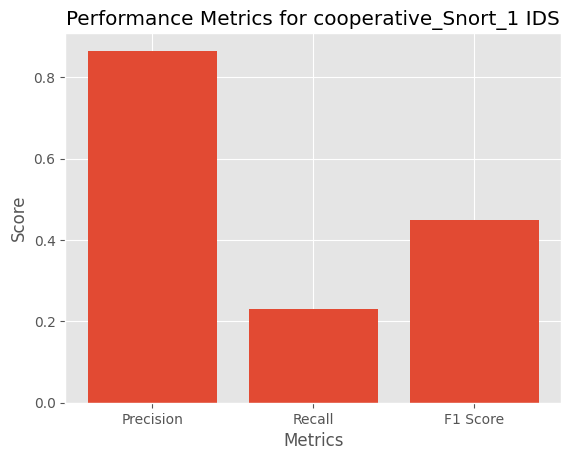

In [259]:
# to Create bar chart
plt.bar(labels, values)

plt.title('Performance Metrics for cooperative_Snort_1 IDS')
plt.xlabel('Metrics')
plt.ylabel('Score')

#  To Show the chart
plt.show()

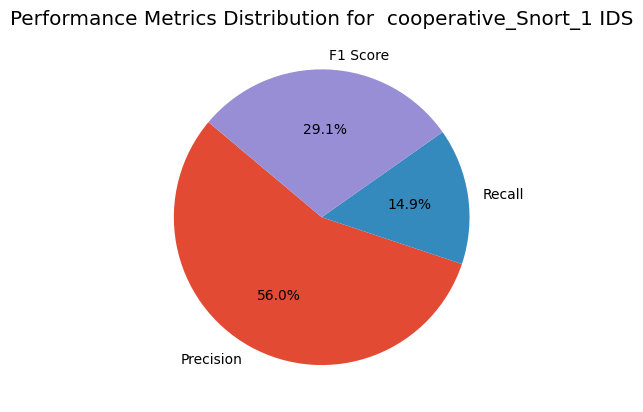

In [260]:


# Create  pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# title
plt.title('Performance Metrics Distribution for  cooperative_Snort_1 IDS')

#  to Show the chart
plt.show()
